# Import Libraries

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Loading Data

In [7]:
train_data = pd.read_csv('/Users/vishal/Desktop/CSV files/Bagging_carinsurance_train.csv')
test_data = pd.read_csv('/Users/vishal/Desktop/CSV files/Bagging_carinsurance_test.csv')

# Exploring Data

# Test data

In [13]:
test_data.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,4001,25,admin.,single,secondary,0,1,1,1,NaN,12,may,12,-1,0,NaN,17:17:42,17:18:06,NaN
1,4002,40,management,married,tertiary,0,0,1,1,cellular,24,jul,1,-1,0,NaN,09:13:44,09:14:37,NaN
2,4003,44,management,single,tertiary,0,-1313,1,1,cellular,15,may,10,-1,0,NaN,15:24:07,15:25:51,NaN
3,4004,27,services,single,secondary,0,6279,1,0,cellular,9,nov,1,-1,0,NaN,09:43:44,09:48:01,NaN
4,4005,53,technician,married,secondary,0,7984,1,0,cellular,2,feb,1,-1,0,NaN,16:31:51,16:34:22,NaN


In [18]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1000 non-null   int64  
 1   Age               1000 non-null   int64  
 2   Job               995 non-null    object 
 3   Marital           1000 non-null   object 
 4   Education         953 non-null    object 
 5   Default           1000 non-null   int64  
 6   Balance           1000 non-null   int64  
 7   HHInsurance       1000 non-null   int64  
 8   CarLoan           1000 non-null   int64  
 9   Communication     779 non-null    object 
 10  LastContactDay    1000 non-null   int64  
 11  LastContactMonth  1000 non-null   object 
 12  NoOfContacts      1000 non-null   int64  
 13  DaysPassed        1000 non-null   int64  
 14  PrevAttempts      1000 non-null   int64  
 15  Outcome           243 non-null    object 
 16  CallStart         1000 non-null   object 
 

In [20]:
test_data.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,0.0
mean,4500.500000,41.473000,0.013000,1398.298000,0.513000,0.12100,15.546000,2.50800,51.653000,0.806000,NaN
std,288.819436,12.051577,0.113331,2660.408024,0.500081,0.32629,8.370541,2.57732,109.024855,2.034331,NaN
min,4001.000000,18.000000,0.000000,-1980.000000,0.000000,0.00000,1.000000,1.00000,-1.000000,0.000000,NaN
25%,4250.750000,32.000000,0.000000,114.750000,0.000000,0.00000,8.000000,1.00000,-1.000000,0.000000,NaN
50%,4500.500000,39.000000,0.000000,517.500000,1.000000,0.00000,15.000000,2.00000,-1.000000,0.000000,NaN
75%,4750.250000,49.250000,0.000000,1609.750000,1.000000,0.00000,21.000000,3.00000,-1.000000,0.000000,NaN
max,5000.000000,92.000000,1.000000,41630.000000,1.000000,1.00000,31.000000,34.00000,586.000000,20.000000,NaN


In [30]:
test_data.isnull().sum()

Id                     0
Age                    0
Job                    5
Marital                0
Education             47
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        221
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome              757
CallStart              0
CallEnd                0
CarInsurance        1000
dtype: int64

# Train data

In [11]:
train_data.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

In [22]:
train_data.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


In [28]:
train_data.isnull().sum()

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

# Handle Missing Values

In [56]:
# Check the unique data types and some sample values for the suspected columns
for col in ["CallStart", "CallEnd"]:
    print(f"Column: {col}")
    print(train_data[col].head())
    print(train_data[col].apply(lambda x: type(x)).value_counts())


Column: CallStart
0    1965.0
1    2417.0
2    3145.0
3    1263.0
4    2326.0
Name: CallStart, dtype: float64
CallStart
<class 'float'>    4000
Name: count, dtype: int64
Column: CallEnd
0    1914.0
1    2393.0
2    3111.0
3    1314.0
4    2293.0
Name: CallEnd, dtype: float64
CallEnd
<class 'float'>    4000
Name: count, dtype: int64


In [60]:
# Convert CallStart and CallEnd to datetime, coercing invalid values to NaT
for col in ["CallStart", "CallEnd"]:
    train_data[col] = pd.to_datetime(train_data[col], format="%H:%M:%S", errors="coerce")
    test_data[col] = pd.to_datetime(test_data[col], format="%H:%M:%S", errors="coerce")

# Check for missing values introduced due to invalid formats
print("Missing values after conversion:")
print(train_data[["CallStart", "CallEnd"]].isnull().sum())


Missing values after conversion:
CallStart    4000
CallEnd      4000
dtype: int64


In [90]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
for column in ['Job', 'Education', 'Communication', 'Outcome']:
    train_data[column] = imputer.fit_transform(train_data[[column]]).ravel()
    test_data[column] = imputer.transform(test_data[[column]]).ravel()


In [92]:
# Initialize label encoders for each categorical column
label_encoders = {}
for column in train_data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    train_data[column] = label_encoders[column].fit_transform(train_data[column])

for column in test_data.select_dtypes(include=['object']).columns:
    test_data[column] = label_encoders[column].transform(test_data[column])


In [94]:
# Define the feature columns and the target column
feature_columns = [col for col in train_data.columns if col != 'CarInsurance']
X_train = train_data[feature_columns]
y_train = train_data['CarInsurance']
X_test = test_data[feature_columns]


# Split the Training Data

In [96]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# Build and Train the Model

In [100]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
base_model = DecisionTreeClassifier()
model = BaggingClassifier(base_model, n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

# Evaluate the Model

In [102]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred_val = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred_val)
report = classification_report(y_val, y_pred_val)

print(f'Validation Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Validation Accuracy: 0.70625
Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.85      0.78       484
         1.0       0.68      0.49      0.57       316

    accuracy                           0.71       800
   macro avg       0.70      0.67      0.67       800
weighted avg       0.70      0.71      0.70       800



# Make Predictions on Test Data

In [125]:
# Make predictions on the test dataset
y_pred_test = model.predict(X_test)

# Add predictions to the test dataset
test_data['CarInsurance'] = y_pred_test

# Save the results
test_data.to_csv('carinsurance_predictions.csv', index=False)


# Plot the distribution of predictions

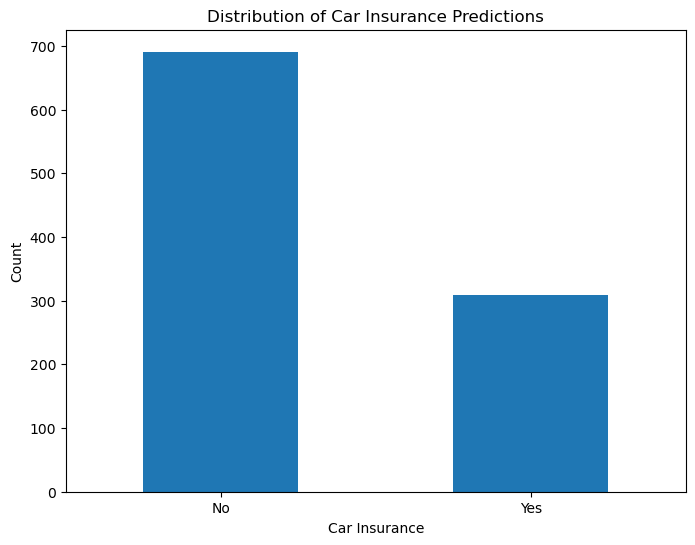

In [137]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming y_pred_test and test_data are already defined

# Create a DataFrame to display the predictions using the index
predictions = pd.DataFrame({'Index': test_data.index, 'CarInsurance': y_pred_test})

# Plot the distribution of predictions
plt.figure(figsize=(8, 6))
predictions['CarInsurance'].value_counts().plot(kind='bar')
plt.title('Distribution of Car Insurance Predictions')
plt.xlabel('Car Insurance')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()
